In [1]:
# import jupyterthemes as jt
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme

import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [2]:
# set_nb_theme('onedork')
# #monokai
# #chesterish
# #oceans16 gamed
# #onedork gamed brdo
# #solarizedl

# Code start from here :

### Importing :

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import joblib


### Reading data from csv

In [5]:
df = pd.read_csv('Samples/airline-price-classification.csv')

In [6]:
df.head()

,date,airline,ch_code,num_code,dep_time,time_taken,stop,arr_time,type,route,TicketCategory
0,5/3/2022,Vistara,UK,812,9:45,10h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,business,"{'source': 'Bangalore', 'destination': 'Hydera...",very expensive
1,18-03-2022,Vistara,UK,975,5:45,06h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,12:15,business,"{'source': 'Delhi', 'destination': 'Hyderabad'}",very expensive
2,9/3/2022,GO FIRST,G8,7537,14:30,08h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:40,economy,"{'source': 'Mumbai', 'destination': 'Hyderabad'}",cheap
3,15-03-2022,GO FIRST,G8,287,10:40,09h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:20,economy,"{'source': 'Mumbai', 'destination': 'Delhi'}",moderate
4,22-03-2022,Vistara,UK,826,12:30,07h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,economy,"{'source': 'Chennai', 'destination': 'Kolkata'}",moderate


In [7]:
df.shape

(240208, 11)

### Data preprocessing on 'price'

In [8]:
price_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=4)
df['TicketCategory'] = price_enc.fit_transform(df[["TicketCategory"]])
print(df['TicketCategory'])

0         3.0
1         3.0
2         0.0
3         2.0
4         2.0
         ... 
240203    0.0
240204    1.0
240205    2.0
240206    2.0
240207    2.0
Name: TicketCategory, Length: 240208, dtype: float64


In [9]:
filename = "price_enc.save"
joblib.dump(price_enc,filename)

### Data preprocessing on 'date'

In [10]:
df["date"]=pd.to_datetime(df["date"])
df["date"]=df["date"].dt.strftime("%m/%d/%Y")


In [11]:
print(df[df.columns[0]])

0         05/03/2022
1         03/18/2022
2         09/03/2022
3         03/15/2022
4         03/22/2022
             ...    
240203    03/25/2022
240204    02/15/2022
240205    02/23/2022
240206    11/02/2022
240207    02/18/2022
Name: date, Length: 240208, dtype: object


In [12]:
pd.DatetimeIndex(df["date"]).weekday

Int64Index([1, 4, 5, 1, 1, 6, 0, 0, 0, 1,
            ...
            3, 3, 0, 2, 3, 4, 1, 2, 2, 4],
           dtype='int64', name='date', length=240208)

In [13]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['dayofyear'] = pd.DatetimeIndex(df['date']).dayofyear

### Data preprocessing : 'ch_code'

In [14]:
ch_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=9)
df['ch_code'] = ch_enc.fit_transform(df[["ch_code"]])
print(df['ch_code'])

0         7.0
1         7.0
2         3.0
3         3.0
4         7.0
         ... 
240203    2.0
240204    2.0
240205    1.0
240206    7.0
240207    6.0
Name: ch_code, Length: 240208, dtype: float64


In [15]:
filename = "ch_enc.save"
joblib.dump(ch_enc,filename)

### Data preprocessing : 'dep_time'

In [16]:
df["dep_time"]=pd.to_datetime(df["dep_time"])
df['dep_time'] = df['dep_time'].dt.strftime("%-H:%M")

In [17]:
df["dep_hour"]=pd.DatetimeIndex(df["dep_time"]).hour
df["dep_minute"]=pd.DatetimeIndex(df["dep_time"]).minute

### Data preprocessing : 'time_taken'

In [18]:
df["hours_taken"] = df["time_taken"].str.split('h').str.get(0)
df["minutes_taken"] = df["time_taken"].str[4:6]
df["minutes_taken"] = df["minutes_taken"].str.replace('m', '')
df["minutes_taken"] = df["minutes_taken"].str.replace('h', '')
df["hours_taken"] = pd.to_numeric(df["hours_taken"])
df["minutes_taken"] = pd.to_numeric(df["minutes_taken"], errors='coerce')

### Data preprocessing : 'stop'

In [19]:
df["stop"] = df["stop"].str.split('-').str.get(0)
df["stop"] = df["stop"].replace(['non'], 0)
df.isna().sum() #  28944 null vals
df["stop"] = df["stop"].replace(['2+'], 2) # Indicates for 2 or more stops
df['stop'] = df['stop'].fillna(0)
df['stop'] = pd.to_numeric(df['stop'])
# print(df[9:14])

### Data preprocessing : 'arr_time'

In [20]:
df["arr_time"]=pd.to_datetime(df["arr_time"])
df['arr_time'] = df['arr_time'].dt.strftime("%-H:%M")
df["arr_hour"]=pd.DatetimeIndex(df["arr_time"]).hour
df["arr_minute"]=pd.DatetimeIndex(df["arr_time"]).minute
df["arr_hour"] = pd.to_numeric(df["arr_hour"])
df["arr_minute"] = pd.to_numeric(df["arr_minute"])


### Data preprocessing : 'type'

In [21]:
type_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=2)
df['type'] = type_enc.fit_transform(df[["type"]])
print(df['type'])

0         0.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
240203    1.0
240204    0.0
240205    1.0
240206    1.0
240207    1.0
Name: type, Length: 240208, dtype: float64


In [22]:
filename = "type_enc.save"
joblib.dump(type_enc,filename)

### Data preprocessing : 'route'

In [23]:
df['source'] = df['route'].str.split( ', ').str.get(0).str.split(':').str.get(1)
df['destination'] = df['route'].str.split( ', ').str.get(1).str.split(':').str.get(1).str.split('}').str.get(0)
df['source'] = df['source'].str.replace('\'', "")
df['destination'] = df['destination'].str.replace('\'', "")

In [24]:
source_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=6)
df['source'] = source_enc.fit_transform(df[["source"]])
print(df['source'])

0         0.0
1         2.0
2         5.0
3         5.0
4         1.0
         ... 
240203    1.0
240204    2.0
240205    2.0
240206    2.0
240207    4.0
Name: source, Length: 240208, dtype: float64


In [25]:
filename = "source_enc.save"
joblib.dump(source_enc,filename)

In [26]:
destination_enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=6)
df['destination'] = destination_enc.fit_transform(df[["destination"]])
print(df['destination'])
df = df.fillna(-1)
df = df.drop(['airline', 'date', 'dep_time', "time_taken", 'arr_time', 'route',], axis=1)
#df = pd.get_dummies(df)

0         3.0
1         3.0
2         3.0
3         2.0
4         4.0
         ... 
240203    3.0
240204    4.0
240205    0.0
240206    5.0
240207    3.0
Name: destination, Length: 240208, dtype: float64


In [27]:
filename = "destination_enc.save"
joblib.dump(destination_enc,filename)

In [28]:
df.head()

,ch_code,num_code,stop,type,TicketCategory,month,day,dayofyear,dep_hour,dep_minute,hours_taken,minutes_taken,arr_hour,arr_minute,source,destination
0,7.0,812,1,0.0,3.0,5,3,123,9,45,10.0,10.0,19,55,0.0,3.0
1,7.0,975,1,0.0,3.0,3,18,77,5,45,6.0,30.0,12,15,2.0,3.0
2,3.0,7537,1,1.0,0.0,9,3,246,14,30,8.0,10.0,22,40,5.0,3.0
3,3.0,287,1,1.0,2.0,3,15,74,10,40,9.0,40.0,20,20,5.0,2.0
4,7.0,826,1,1.0,2.0,3,22,81,12,30,7.0,25.0,19,55,1.0,4.0


In [29]:
print(df.columns)

Index(['ch_code', 'num_code', 'stop', 'type', 'TicketCategory', 'month', 'day',
       'dayofyear', 'dep_hour', 'dep_minute', 'hours_taken', 'minutes_taken',
       'arr_hour', 'arr_minute', 'source', 'destination'],
      dtype='object')


In [30]:
X = df.loc[:, df.columns != 'TicketCategory']
Y = df['TicketCategory']

In [31]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=8)

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler = ss.fit(XTrain)
trainX_scaled = scaler.transform(XTrain)
testX_scaled = scaler.transform(XTest)

In [33]:
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier(alpha = 0.1)
ridge.fit(trainX_scaled, YTrain)

rfc = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
rfc.fit(trainX_scaled, YTrain)

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 50,activation = 'tanh',
                        solver = 'adam')

mlp_clf.fit(trainX_scaled, YTrain)

dtree = DecisionTreeClassifier(max_depth=50, random_state=42)
dtree.fit(trainX_scaled, YTrain)

knn = KNeighborsClassifier()
knn.fit(trainX_scaled, YTrain) 

logestic = LogisticRegression(C=0.1, penalty = 'l2', solver = 'lbfgs')
logestic.fit(trainX_scaled, YTrain) 

# rbf_svc = svm.SVC(kernel='rbf', gamma='scale', C=1).fit(trainX_scaled, YTrain)
# poly_svc = svm.SVC(kernel='poly',degree = 3, C=1).fit(trainX_scaled, YTrain)

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [35]:
for i, clf in enumerate((ridge, rfc, mlp_clf, dtree, knn, logestic)):
    predictions = clf.predict(testX_scaled)
    print("Accuracy of: " + str(clf)+":"+str(accuracy_score(YTest, predictions)))
    print('\n')
    print(classification_report(YTest, predictions))

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of: RidgeClassifier(alpha=0.1):0.7128970484159693


              precision    recall  f1-score   support

         0.0       0.74      0.54      0.62     13048
         1.0       0.00      0.00      0.00      4405
         2.0       0.74      0.84      0.79     20847
         3.0       0.65      1.00      0.79      9742

    accuracy                           0.71     48042
   macro avg       0.53      0.59      0.55     48042
weighted avg       0.66      0.71      0.67     48042

Accuracy of: RandomForestClassifier(n_jobs=-1, random_state=42):0.9621581116523042


              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     13048
         1.0       0.95      0.96      0.95      4405
         2.0       0.97      0.96      0.96     20847
         3.0       0.99      0.98      0.98      9742

    accuracy                           0.96     48042
   macro avg       0.96      0.96      0.96     48042
weighted avg       0.96      0.96      

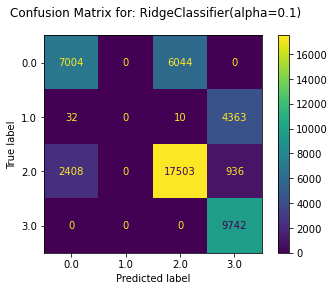

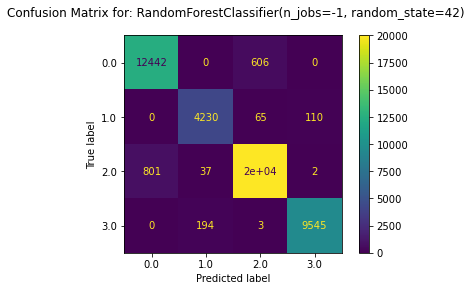

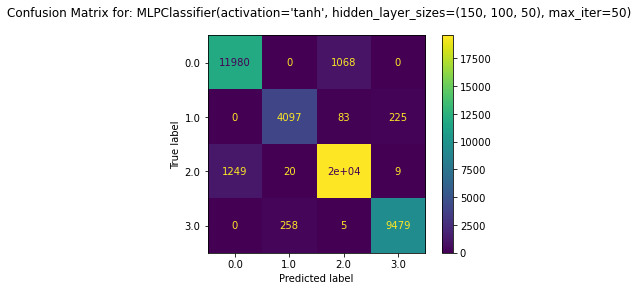

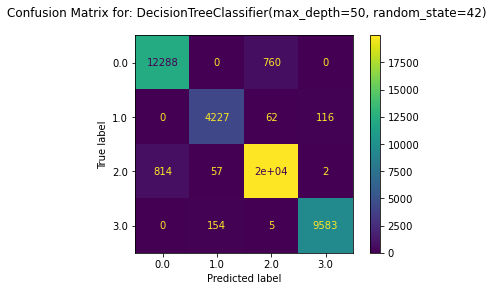

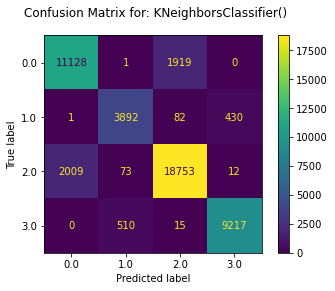

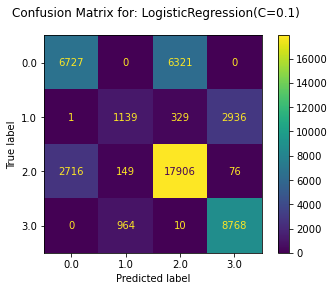

In [36]:
from sklearn.metrics import plot_confusion_matrix

for i, clf in enumerate((ridge, rfc, mlp_clf, dtree, knn, logestic)):
    fig = plot_confusion_matrix(clf, testX_scaled, YTest, display_labels=clf.classes_)
    fig.figure_.suptitle("Confusion Matrix for: " + str(clf))
    plt.show()

In [ ]:
import joblib
filename = '_ClassificationModel.save'
for i, clf in enumerate((ridge, rfc, mlp_clf, dtree, knn, logestic)):
    joblib.dump(clf, str(clf)+filename)

In [ ]:
# # some time later...

# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)

## Scaling Applied :

### Accuracy of: MLPClassifier():0.8862869988759835
### Accuracy of: MLPClassifier(activation='relu', hidden_layer_sizes=(150, 100, 50), max_iter=50, solver='lbfgs'):0.7662670163606844
### Accuracy of: MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50), max_iter=50,solver='sgd'):0.8349777278214895
### Accuracy of: MLPClassifier(activation='relu', hidden_layer_sizes=(150, 100, 50), max_iter=50,solver='adam'):0.9352233462387078
### Accuracy of: MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50), max_iter=50,solver='adam'):0.9402397901835894
### Accuracy of: MLPClassifier(activation='tanh', hidden_layer_sizes=(150, 100, 50),max_iter=100,solver='adam'):0.9444444444444444 (take > 10 mins) 

### Accuracy of: LogisticRegression(multi_class='multinomial', max_iter=100)  :0.7278423046500978
### Accuracy of: LogisticRegression(multi_class='multinomial', max_iter=50)   :0.715186711627326
### Accuracy of: LogisticRegression(C=0.01, solver='liblinear'):               0.689480038299821
### Accuracy of: LogisticRegression(C=0.1, solver='lbfgs'):0.7187044669247742

### Accuracy of: RidgeClassifier(alpha=0.1):0.7104824944839931


### Accuracy of: KNeighborsClassifier():0.8935098455518088

### Accuracy of: DecisionTreeClassifier(random_state=42):                       0.959056658756921
### Accuracy of: DecisionTreeClassifier(max_depth=20, random_state=42):        0.9547895591357562
### Accuracy of: DecisionTreeClassifier(max_depth=50, random_state=42):        0.959056658756921

### Accuracy of: RandomForestClassifier(n_jobs=-1, random_state=42):           0.9621581116523042-->BEST



# Conclusion :
  
# BIG NOTES :
  ### We tried performing both label, onehot encoder classifying them to 4 binary categories of the Y data, And was found that both results in fitting models gave nearly the same accuracy but label encoder had slight advantage due to inability of logestic reg. to fit on a 4D array of y labels in oneHot.

  ### all this predictions are gathered on GoogleCollab and it may slightly differs in jupyter or pycharm

 